In [1]:
import pandas as pd
from repositorio_de_banco import FaixaReceber, ConsultaExecutor
from conexao_banco_dados_resulth import ConexaoBancoDadosResulth
from matplotlib import pyplot as plt
from contas_a_receber import calcular_dados_inadimplencia, criar_regras_de_negocio

In [2]:
faixa_1_a_30_dias_atraso = FaixaReceber(faixa_1_a_30_dias=True)
faixa_31_a_60_dias_atraso = FaixaReceber(faixa_31_a_60_dias=True)
faixa_61_a_90_dias_atraso = FaixaReceber(faixa_61_a_90_dias=True)
faixa_91_a_120_dias_atraso = FaixaReceber(faixa_91_a_120_dias=True)
faixa_acima_de_120_dias_atraso = FaixaReceber(faixa_120_acima_dias=True)

In [3]:
repositorio = ConsultaExecutor(
    data_inicial="2000-12-31",
    data_final="2100-12-31",
    conexao_banco=ConexaoBancoDadosResulth()
)

In [4]:
consulta_menor_30_dias = faixa_1_a_30_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta_31_a_60_dias = faixa_31_a_60_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta_61_a_90_dias = faixa_61_a_90_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta_91_a_120_dias = faixa_91_a_120_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta_acima_120_dias = faixa_acima_de_120_dias_atraso.acessar_faixa_clientes_em_atraso()

In [5]:
resultado_menor_30_dias = repositorio.consultar_clientes_faixa_atraso_dias(consulta_menor_30_dias)
resultado_31_a_60_dias = repositorio.consultar_clientes_faixa_atraso_dias(consulta_31_a_60_dias)
resultado_61_a_90_dias = repositorio.consultar_clientes_faixa_atraso_dias(consulta_61_a_90_dias)
resultado_91_a_120_dias = repositorio.consultar_clientes_faixa_atraso_dias(consulta_91_a_120_dias)
resultado_120_dias = repositorio.consultar_clientes_faixa_atraso_dias(consulta_acima_120_dias)

In [6]:
def calcular_total(resultado):
    total = []
    for valor in resultado:
        total.append(valor[2])
    return sum(total)

In [7]:
def acessar_cod_nomes_clientes(resultado):
    cod = [item[0] for item in resultado]
    nome = [item[1] for item in resultado]
    dados = []
    dados.append(cod)
    dados.append(nome)
    return dados

def transformar_em_dataframe(clientes):
    return pd.DataFrame({"COD": clientes[0], "NOME": clientes[1]})

In [8]:
def somar(*args):
    return sum(args)

In [9]:
def transformar_em_lista(*args):
    return list(args)

In [10]:
def formatar_numero(valor):
    return f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

In [11]:
def transformar_percentuais(args):
    return [f"{x * 100:.2f}%" for x in args]

In [12]:
def formatar_numeros(valor):
    pass

In [13]:
total_debito_menor_30_dias = calcular_total(resultado_menor_30_dias)
total_debito_31_a_60_dias = calcular_total(resultado_31_a_60_dias)
total_debito_61_a_90_dias = calcular_total(resultado_61_a_90_dias)
total_debito_91_a_120_dias = calcular_total(resultado_91_a_120_dias)
total_debito_120_dias = calcular_total(resultado_120_dias)

regras = criar_regras_de_negocio(repositorio)
dados_inadimplencia = calcular_dados_inadimplencia(regras)
saldo_total = dados_inadimplencia["saldo_contas_a_receber"]

relacao_menor_30_dias = total_debito_menor_30_dias / saldo_total
relacao_31_a_60_dias = total_debito_31_a_60_dias / saldo_total
relacao_61_a_90_dias = total_debito_61_a_90_dias / saldo_total
relacao_91_a_120_dias = total_debito_91_a_120_dias / saldo_total
relacao_120_dias = total_debito_120_dias / saldo_total

In [14]:
dados = transformar_em_lista(relacao_menor_30_dias, relacao_31_a_60_dias, relacao_61_a_90_dias, relacao_91_a_120_dias, relacao_120_dias)
valores_em_cada_faixa = transformar_em_lista(total_debito_menor_30_dias, total_debito_31_a_60_dias, total_debito_61_a_90_dias, total_debito_91_a_120_dias, total_debito_120_dias)
saldo_total_debitos = somar(total_debito_menor_30_dias, total_debito_31_a_60_dias, total_debito_61_a_90_dias, total_debito_91_a_120_dias, total_debito_120_dias)

In [15]:
# Verificação dos dados antes de plotar
print(f"Saldo total do contas a receber: {formatar_numero(saldo_total)}")
print(f"Saldo total dos débitos: {formatar_numero(saldo_total_debitos)}")
print(f"Valores em cada faixa: {valores_em_cada_faixa}")
print(f"Percentuais: {transformar_percentuais(dados)}")
print(f"Soma dos percentuais: {sum(dados):.2%}")

Saldo total do contas a receber: 589.804,05
Saldo total dos débitos: 91.120,59
Valores em cada faixa: [49701.0, 18326.23, 10188.0, 1315.6599999999999, 11589.7]
Percentuais: ['8.43%', '3.11%', '1.73%', '0.22%', '1.97%']
Soma dos percentuais: 15.45%


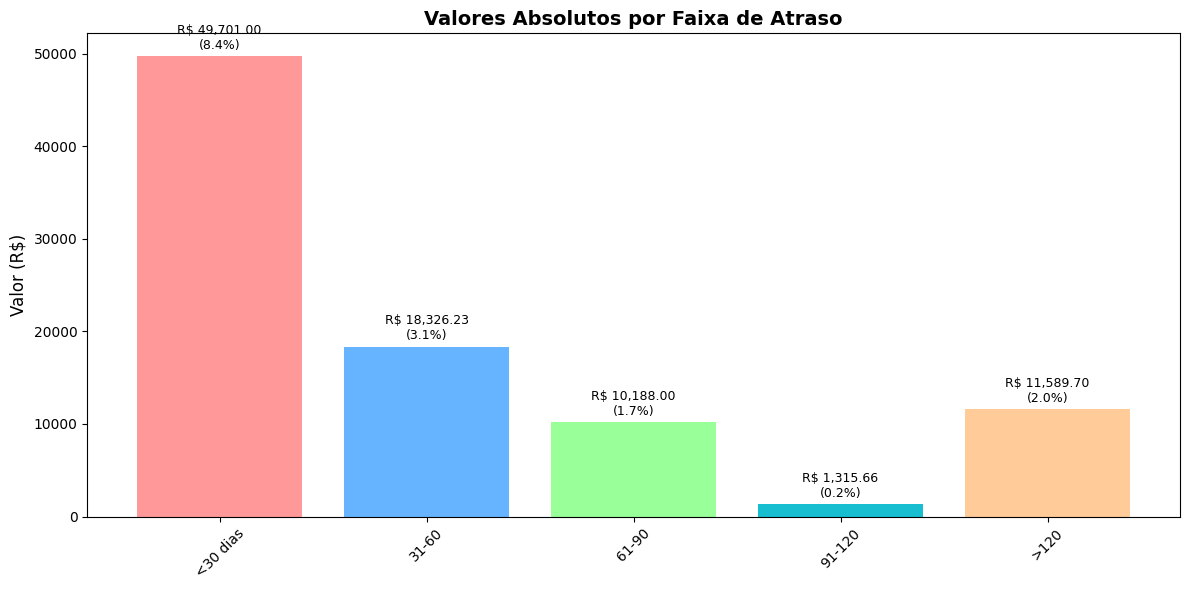

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

categorias = ['<30 dias', '31-60', '61-90', '91-120', '>120']
valores = [total_debito_menor_30_dias, total_debito_31_a_60_dias, total_debito_61_a_90_dias, total_debito_91_a_120_dias, total_debito_120_dias]

cores = ['#ff9999','#66b3ff','#99ff99','#17becf', '#ffcc99']
bars = ax.bar(categorias, valores, color=cores)
ax.set_title('Valores Absolutos por Faixa de Atraso', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor (R$)', fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(valores)*0.01,
            f'R$ {height:,.2f}\n({height/saldo_total:.1%})',
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#resultado_menor_30_dias
#resultado_31_a_60_dias
#resultado_61_a_90_dias
#resultado_91_a_120_dias
#resultado_120_dias

resultado_faixa = resultado_61_a_90_dias

clientes = acessar_cod_nomes_clientes(resultado_faixa)
df_clintes = transformar_em_dataframe(clientes)

print(df_clintes)

        COD                         NOME
0  00001705      GILMAR DE MENEZES SILVA
1  00001602  SARMENTO TRANSPORTES EIRELI
2  00001863      CHARLES TRATOTERRA LTDA
3  00000393         JOSE MACIEL DA CUNHA
